<a href="https://colab.research.google.com/github/manjotmb20/Judicial-Decision-Prediction/blob/master/nlptask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import zipfile

In [0]:
zipref=zipfile.ZipFile("Train_docs.zip")
zipref.extractall()
zipref.close()
zipref=zipfile.ZipFile("Train_tags.zip")
zipref.extractall()
zipref.close()

In [0]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [90]:
import nltk
nltk.download("punkt")
from nltk.corpus import stopwords
import seaborn as sns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
list1=[]
col=[]
tags=[]
for i in range(80):
  list1.append("case_{}_statement.txt".format(i))
  col.append(i)
  tags.append("case{}.txt".format(i))


In [0]:
listtag=[]
for row in tags:
  tag=open("../content/Train_tags/"+row).read()
  listtag.append(tag)

In [0]:
df=pd.DataFrame()
df["name"]=list1

In [0]:
df["tags"]=listtag

In [0]:
tagset=[]
for row in df.tags:
  for i in row.split(","):
    tagset.append(i)

In [96]:
len(tagset)

2225

In [0]:
all_tags=nltk.FreqDist(tagset)
dftag1=pd.DataFrame()
dftag1["tag"]=all_tags.keys()
dftag1["count"]=all_tags.values()
s=[]
s=all_tags.keys()

In [98]:
s

dict_keys(['Cause of Action', 'Abetment', ' Abetment of Suicide', ' Absconding', ' Accidental Death', ' Apprehension', ' Documentary Evidence', ' Dowry Death', ' Interested Witness', ' Post', 'Decision', ' Exemption', ' Exemption Notification', ' Import', ' Importer', ' India', ' Larger Bench', ' Notification', ' Order', ' Order of Reference', ' Reference', ' Statement', 'Child Labour', ' Compensation', ' Fundamental Right', ' Liberty', ' Mandamus', ' Sexual Harassment', ' Union Territories', ' Writ of Mandamus', 'Account', ' Auditor', ' Authentication', ' Commercial', ' Consent', ' Direction', ' Dispute', ' Due', ' Generating Station', ' National Commission', ' Rate', ' Tariff', 'Admission', ' Adoption', ' Adoptive Parent', ' Age', ' Compromise', ' Custody', ' Declaration', ' Family', ' Father', " Father's Right", ' Female', ' Given in Adoption', ' Guardianship', ' Hindu', ' Illegitimate Child', ' Indifference', ' Maintenance', ' Marriage', ' Mental Incapacity', ' Minority', ' Mohamme

In [0]:
g=dftag1.nlargest(columns="count",n=50)

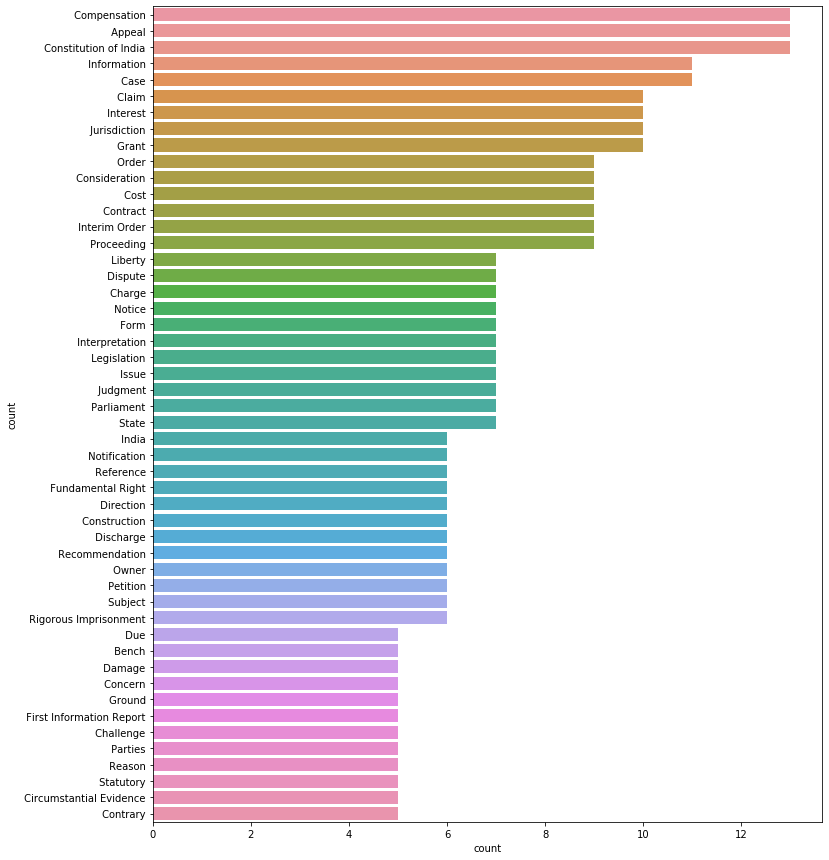

In [100]:
plt.figure(figsize=(12,15))
ax=sns.barplot(data=g,x="count",y="tag")
ax.set(ylabel='count')
plt.show()

Cleaning

In [0]:
def clean_text(text):
  text=re.sub("\'", "", text )
  text=re.sub("[^a-zA-z]"," ",text)
  text=' '.join(text.split())
  text=text.lower()
  return text

In [0]:
tag=[]
for name in df.name:
  s=open("../content/Train_docs/"+name,"r",encoding = "ISO-8859-1").read()
  tag.append(clean_text(s))
df["content"]=tag

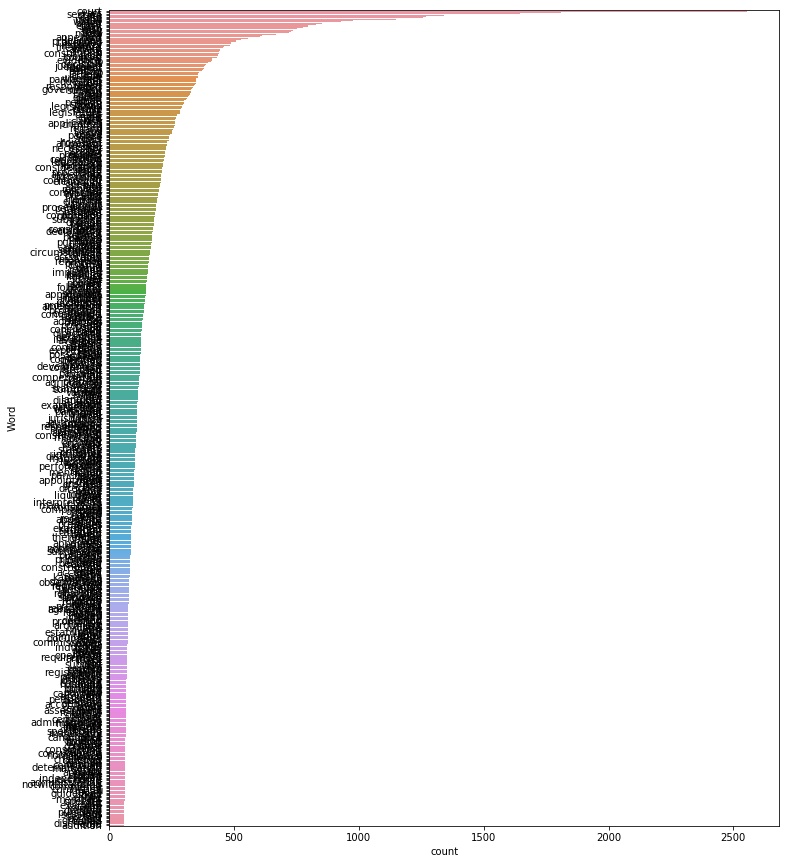

In [110]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  
  d = words_df.nlargest(columns="count", n = terms) 
  
 
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  

freq_words(df["content"], 600)

In [104]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
  no_stopwords=[w for w in text.split() if not w in stop_words]
  return ' '.join(no_stopwords)
df["content"]=df["content"].apply(lambda x: remove_stopwords(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


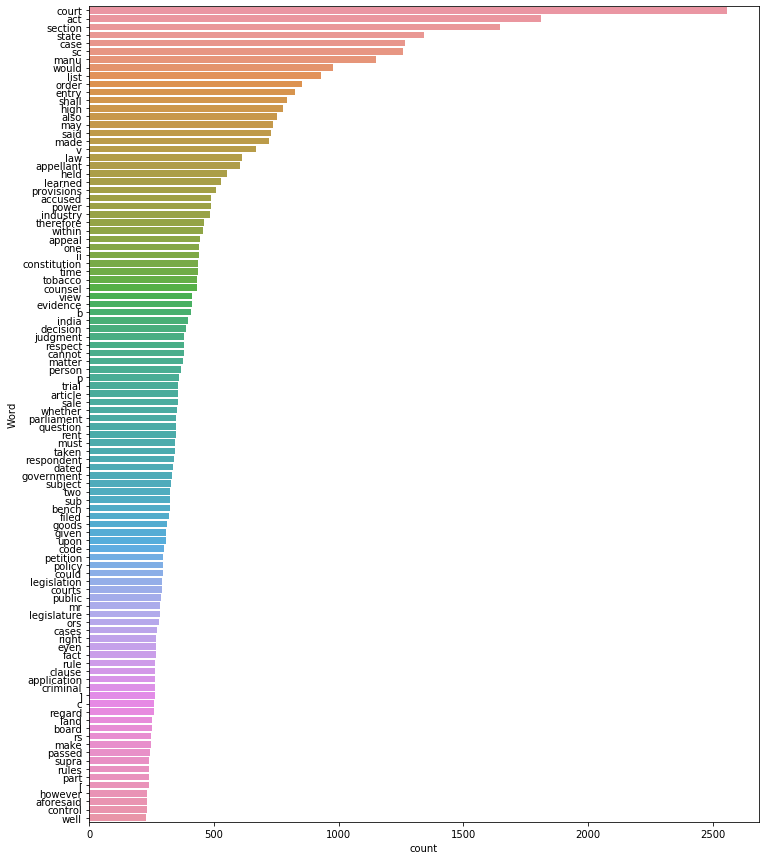

In [105]:
freq_words(df["content"], 100)

In [106]:
df.head()

,name,tags,content
0,case_0_statement.txt,Cause of Action,kurian joseph j leave granted special leave pe...
1,case_1_statement.txt,"Abetment, Abetment of Suicide, Absconding, Acc...",abhay manohar sapre j delay filing special lea...
2,case_2_statement.txt,"Decision, Exemption, Exemption Notification, I...",pinaki chandra ghose j criminal appeal special...
3,case_3_statement.txt,"Child Labour, Compensation, Fundamental Right,...",matter placed us bench court differed view exp...
4,case_4_statement.txt,"Account, Auditor, Authentication, Commercial, ...",heard learned counsel parties prayer made writ...


In [127]:
listtag=[]
for row in tags:
  tag=open("../content/Train_tags/"+row).read()
  listtag.append(tag)
df['tags']=listtag  
df.head()

,name,tags,content
0,case_0_statement.txt,Cause of Action,kurian joseph j leave granted special leave pe...
1,case_1_statement.txt,"Abetment, Abetment of Suicide, Absconding, Acc...",abhay manohar sapre j delay filing special lea...
2,case_2_statement.txt,"Decision, Exemption, Exemption Notification, I...",pinaki chandra ghose j criminal appeal special...
3,case_3_statement.txt,"Child Labour, Compensation, Fundamental Right,...",matter placed us bench court differed view exp...
4,case_4_statement.txt,"Account, Auditor, Authentication, Commercial, ...",heard learned counsel parties prayer made writ...


In [0]:
from sklearn.preprocessing import MultiLabelBinarizer
multilabel_binarizer=MultiLabelBinarizer()
multilabel_binarizer.fit(df["tags"])
labels=multilabel_binarizer.classes_

y=multilabel_binarizer.transform(df["tags"])

In [129]:
labels

array([' ', "'", ',', '.', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I',
       'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
       'W', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k',
       'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x',
       'y', 'z'], dtype=object)

In [109]:
t=[]
for i in all_tags.keys():
  t.append(i)

len(t)

1322

In [0]:
tfidf_vectorizer=TfidfVectorizer(max_df=0.8,max_features=500)
xtrain, xval, ytrain, yval = train_test_split(df['content'], y, test_size=0.2, random_state=9)

In [0]:
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

In [117]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)
clf.fit(xtrain_tfidf, ytrain)
y_pred = clf.predict(xval_tfidf)
y_pred[3]
multilabel_binarizer.inverse_transform(y_pred)[3]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(' ',
 'A',
 'C',
 'D',
 'E',
 'F',
 'I',
 'O',
 'P',
 'R',
 'S',
 'a',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'l',
 'm',
 'n',
 'o',
 'p',
 'r',
 's',
 't',
 'u',
 'v',
 'y')